#### Имопрт библиотек для анализа данных

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from csv import reader
from apriori_python import apriori as apr 
from efficient_apriori import apriori as eff_apr
from fpgrowth_py import fpgrowth
from PyARMViz import PyARMViz

#### Загрузка данных

Выполнены следующие действия:

* Импорт данных из .csv файла
* Обработка данных, удаление строк и столбцов со значениями **Null**/**None**/**NaN**

In [2]:
with open('test_var.csv') as csv_file:
    csv_reader = reader(csv_file)
    transactions = list(csv_reader)

#### Использование **apriori_python** для построения ассоциативных правил

Выполнены следующие действия:

* Пстроение списка ассоциативных правил методом **apriori_python**:
    * **'minSup'** – минимальная поддержка, то есть ```число транзакций, содержащих A и B / общее число транзакций```
    * **'minConf'** – минимальная достоверность, то есть ```число транзакций, содержащих A и B / число транзакций, содержащих только A```
* Оценка времени, потраченного на выполнение метода

In [3]:

t1 = []  # Хранение затраченного времени
t2 = []  # Хранение затраченного времени

start = time.perf_counter()
freqItemSetAp1, rules1 = apr(transactions, minSup=0.2, minConf=0.6)  # Достоверность 60%
t1.append(time.perf_counter()-start)
rules1

[[{'chips'}, {'vodka'}, 0.6363636363636364],
 [{'chips'}, {'bear'}, 0.6363636363636364],
 [{'fish'}, {'bear'}, 0.6666666666666666],
 [{'chips', 'crackers'}, {'bear'}, 0.6666666666666666],
 [{'fish'}, {'bear', 'crackers'}, 0.6666666666666666],
 [{'crackers', 'fish'}, {'bear'}, 0.6666666666666666],
 [{'crackers'}, {'bear'}, 0.6923076923076923],
 [{'juice', 'vodka'}, {'crackers'}, 0.6923076923076923],
 [{'vodka'}, {'crackers'}, 0.7333333333333333],
 [{'juice'}, {'crackers'}, 0.75],
 [{'crackers', 'juice'}, {'vodka'}, 0.75],
 [{'bear', 'juice'}, {'crackers'}, 0.75],
 [{'meat'}, {'crackers'}, 0.8],
 [{'juice'}, {'vodka'}, 0.8125],
 [{'chips'}, {'crackers'}, 0.8181818181818182],
 [{'crackers', 'vodka'}, {'juice'}, 0.8181818181818182],
 [{'nuts'}, {'crackers'}, 0.8571428571428571],
 [{'bear', 'chips'}, {'crackers'}, 0.8571428571428571],
 [{'chips', 'vodka'}, {'juice'}, 0.8571428571428571],
 [{'vodka'}, {'juice'}, 0.8666666666666667],
 [{'cheese'}, {'crackers'}, 0.8888888888888888],
 [{'bear'}

In [4]:
start = time.perf_counter()
freqItemSetAp2, rules2 = apr(transactions, minSup=0.2, minConf=0.8)  # Достоверность 80%
t2.append(time.perf_counter()-start)
rules2

[[{'juice'}, {'vodka'}, 0.8125],
 [{'chips'}, {'crackers'}, 0.8181818181818182],
 [{'crackers', 'vodka'}, {'juice'}, 0.8181818181818182],
 [{'nuts'}, {'crackers'}, 0.8571428571428571],
 [{'bear', 'chips'}, {'crackers'}, 0.8571428571428571],
 [{'chips', 'vodka'}, {'juice'}, 0.8571428571428571],
 [{'vodka'}, {'juice'}, 0.8666666666666667],
 [{'cheese'}, {'crackers'}, 0.8888888888888888],
 [{'bear'}, {'crackers'}, 0.9],
 [{'fish'}, {'crackers'}, 1.0],
 [{'chips', 'juice'}, {'vodka'}, 1.0],
 [{'bear', 'fish'}, {'crackers'}, 1.0]]

#### Использование **efficient-apriori** для построения ассоциативных правил

Выполнены следующие действия:

* Пстроение списка ассоциативных правил методом **efficient-apriori**
* Оценка времени, потраченного на выполнение метода

In [5]:
start = time.perf_counter()
freqItemSetApEf1, rules_ap_ef1 = eff_apr(transactions, min_support=0.2, min_confidence=0.6)  # Достоверность 60%
t1.append(time.perf_counter()-start)
for i in rules_ap_ef1:
    print(i)

{chips} -> {bear} (conf: 0.636, supp: 0.233, lift: 0.955, conv: 0.917)
{crackers} -> {bear} (conf: 0.692, supp: 0.600, lift: 1.038, conv: 1.083)
{bear} -> {crackers} (conf: 0.900, supp: 0.600, lift: 1.038, conv: 1.333)
{fish} -> {bear} (conf: 0.667, supp: 0.200, lift: 1.000, conv: 1.000)
{meat} -> {bear} (conf: 0.600, supp: 0.200, lift: 0.900, conv: 0.833)
{cheese} -> {crackers} (conf: 0.889, supp: 0.267, lift: 1.026, conv: 1.200)
{chips} -> {crackers} (conf: 0.818, supp: 0.300, lift: 0.944, conv: 0.733)
{chips} -> {vodka} (conf: 0.636, supp: 0.233, lift: 1.273, conv: 1.375)
{fish} -> {crackers} (conf: 1.000, supp: 0.300, lift: 1.154, conv: 133333333.333)
{juice} -> {crackers} (conf: 0.750, supp: 0.400, lift: 0.865, conv: 0.533)
{meat} -> {crackers} (conf: 0.800, supp: 0.267, lift: 0.923, conv: 0.667)
{nuts} -> {crackers} (conf: 0.857, supp: 0.200, lift: 0.989, conv: 0.933)
{vodka} -> {crackers} (conf: 0.733, supp: 0.367, lift: 0.846, conv: 0.500)
{vodka} -> {juice} (conf: 0.867, supp:

In [6]:
start = time.perf_counter()
freqItemSetApEf2, rules_ap_ef2 = eff_apr(transactions, min_support=0.2, min_confidence=0.8) # Достоверность 80%
t2.append(time.perf_counter()-start)
for i in rules_ap_ef2:
    print(i)

{bear} -> {crackers} (conf: 0.900, supp: 0.600, lift: 1.038, conv: 1.333)
{cheese} -> {crackers} (conf: 0.889, supp: 0.267, lift: 1.026, conv: 1.200)
{chips} -> {crackers} (conf: 0.818, supp: 0.300, lift: 0.944, conv: 0.733)
{fish} -> {crackers} (conf: 1.000, supp: 0.300, lift: 1.154, conv: 133333333.333)
{meat} -> {crackers} (conf: 0.800, supp: 0.267, lift: 0.923, conv: 0.667)
{nuts} -> {crackers} (conf: 0.857, supp: 0.200, lift: 0.989, conv: 0.933)
{vodka} -> {juice} (conf: 0.867, supp: 0.433, lift: 1.625, conv: 3.500)
{juice} -> {vodka} (conf: 0.812, supp: 0.433, lift: 1.625, conv: 2.667)
{bear, chips} -> {crackers} (conf: 0.857, supp: 0.200, lift: 0.989, conv: 0.933)
{bear, fish} -> {crackers} (conf: 1.000, supp: 0.200, lift: 1.154, conv: 133333333.333)
{chips, vodka} -> {juice} (conf: 0.857, supp: 0.200, lift: 1.607, conv: 3.267)
{chips, juice} -> {vodka} (conf: 1.000, supp: 0.200, lift: 2.000, conv: 500000000.000)
{crackers, vodka} -> {juice} (conf: 0.818, supp: 0.300, lift: 1.53

#### Использование **FPGrowth** для построения ассоциативных правил

Выполнены следующие действия:

* Пстроение списка ассоциативных правил методом **FPGrowth**
* Оценка времени, потраченного на выполнение метода

In [7]:
start = time.perf_counter()
freqItemSetFP1, rules_fp1 = fpgrowth(transactions, minSupRatio=0.2, minConf=0.6)
t1.append(time.perf_counter()-start)
for i in rules_fp1:
    print(i)

[{'nuts'}, {'crackers'}, 0.8571428571428571]
[{'cheese'}, {'crackers'}, 0.8888888888888888]
[{'fish'}, {'bear'}, 0.6666666666666666]
[{'fish'}, {'bear', 'crackers'}, 0.6666666666666666]
[{'fish', 'bear'}, {'crackers'}, 1.0]
[{'fish', 'crackers'}, {'bear'}, 0.6666666666666666]
[{'fish'}, {'crackers'}, 1.0]
[{'meat'}, {'crackers'}, 0.8]
[{'chips', 'vodka'}, {'juice'}, 0.8571428571428571]
[{'chips', 'juice'}, {'vodka'}, 1.0]
[{'chips'}, {'bear'}, 0.6363636363636364]
[{'chips', 'bear'}, {'crackers'}, 0.8571428571428571]
[{'chips', 'crackers'}, {'bear'}, 0.6666666666666666]
[{'chips'}, {'vodka'}, 0.6363636363636364]
[{'chips'}, {'crackers'}, 0.8181818181818182]
[{'vodka'}, {'crackers'}, 0.7333333333333333]
[{'vodka', 'crackers'}, {'juice'}, 0.8181818181818182]
[{'vodka', 'juice'}, {'crackers'}, 0.6923076923076923]
[{'crackers', 'juice'}, {'vodka'}, 0.75]
[{'vodka'}, {'juice'}, 0.8666666666666667]
[{'juice'}, {'vodka'}, 0.8125]
[{'bear', 'juice'}, {'crackers'}, 0.75]
[{'juice'}, {'crackers'}

In [8]:
start = time.perf_counter()
freqItemSetFP2, rules_fp2 = fpgrowth(transactions, minSupRatio=0.2, minConf=0.8)
t2.append(time.perf_counter()-start)
for i in rules_fp2:
    print(i)

[{'nuts'}, {'crackers'}, 0.8571428571428571]
[{'cheese'}, {'crackers'}, 0.8888888888888888]
[{'fish', 'bear'}, {'crackers'}, 1.0]
[{'fish'}, {'crackers'}, 1.0]
[{'chips', 'vodka'}, {'juice'}, 0.8571428571428571]
[{'chips', 'juice'}, {'vodka'}, 1.0]
[{'chips', 'bear'}, {'crackers'}, 0.8571428571428571]
[{'chips'}, {'crackers'}, 0.8181818181818182]
[{'vodka', 'crackers'}, {'juice'}, 0.8181818181818182]
[{'vodka'}, {'juice'}, 0.8666666666666667]
[{'juice'}, {'vodka'}, 0.8125]
[{'bear'}, {'crackers'}, 0.9]


#### Визуализация полученных данных

Выполнены следующие действия:

* Сравнение времени выполнения всех алгоритмов и построение гистограммы
* Построение диаграмм ассоциативных правил:
    * Для метода **efficient_apriori**
    * Для метода **fpgrowth**

Время выполнения apriori при достоверности 60%:  0.0012403000000063003 

Время выполнения efficient_apriori при достоверности 60%:  0.0007003999999994903 

Время выполнения fpgrowth при достоверности 60%:  0.0017679999999984375 



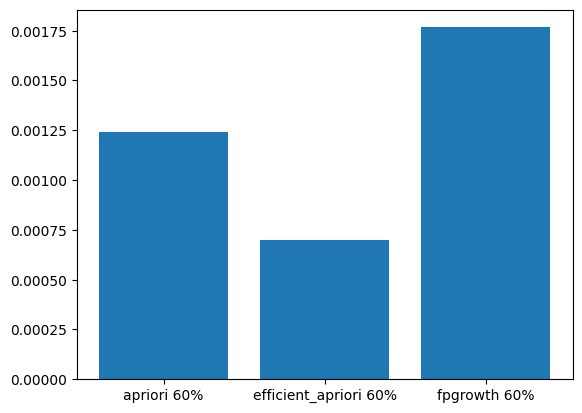

In [9]:
print('Время выполнения apriori при достоверности 60%: ', t1[0], '\n')
print('Время выполнения efficient_apriori при достоверности 60%: ', t1[1], '\n')
print('Время выполнения fpgrowth при достоверности 60%: ', t1[2], '\n')
plt.bar(['apriori 60%', 'efficient_apriori 60%', 'fpgrowth 60%'], t1)
plt.show()

Время выполнения apriori при достоверности 80%:  0.0011571999999944182 

Время выполнения efficient_apriori при достоверности 80%:  0.0007507000000117614 

Время выполнения fpgrowth при достоверности 80%:  0.0024969000000112374 



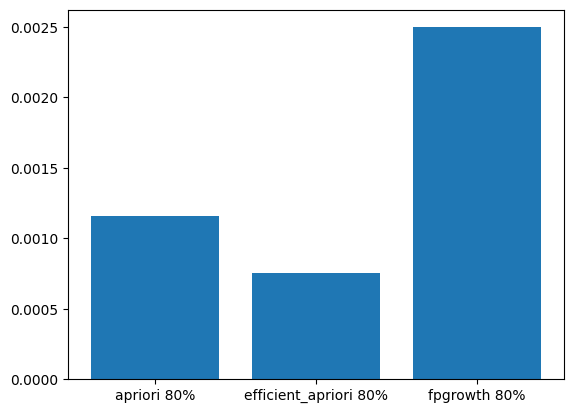

In [10]:
print('Время выполнения apriori при достоверности 80%: ', t2[0], '\n')
print('Время выполнения efficient_apriori при достоверности 80%: ', t2[1], '\n')
print('Время выполнения fpgrowth при достоверности 80%: ', t2[2], '\n')
plt.bar(['apriori 80%', 'efficient_apriori 80%', 'fpgrowth 80%'], t2)
plt.show()

*Ассоциативные правила и параметры при достоверности 60%*

In [11]:
# Efficient apriori rules visualization

PyARMViz.adjacency_parallel_coordinate_plot(rules_ap_ef1)
PyARMViz.metadata_scatter_plot(rules_ap_ef1)

*Ассоциативные правила и параметры при достоверности 80%*

In [12]:
# Efficient apriori rules visualization

PyARMViz.adjacency_parallel_coordinate_plot(rules_ap_ef2)
PyARMViz.metadata_scatter_plot(rules_ap_ef2)

# Выводы по проделанной работе:

* Получены базовые знания в области анализа транзакий на основе ассоциативных правил
* Рассмотрены разные алгоритмы постройки ассоциативных правил
    * Самым эффективным по обработке данных стал метод **efficient_apriori**, *t = 0,19 сек.*
* Полученные данные позволяют сделать выводы по предпочтениям покупателей при выборе товаров и зависимости принятия решений  